In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [139]:
df = pd.read_csv('accelerometer.csv')
df.head()

,y,x1,x2,x3
0,1,1.004,0.090,-0.125
1,1,1.004,-0.043,-0.125
2,1,0.969,0.090,-0.121
3,1,0.973,-0.012,-0.137
4,1,1.000,-0.016,-0.121


In [156]:
#menentukan target dan label
X = df.iloc[:,1:4] #feature
y = df.iloc[:,:1]  #target
X.head()

,x1,x2,x3
0,1.004,0.090,-0.125
1,1.004,-0.043,-0.125
2,0.969,0.090,-0.121
3,0.973,-0.012,-0.137
4,1.000,-0.016,-0.121


In [141]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [142]:
standard = StandardScaler()
MinMax  = MinMaxScaler()

# Cleansing

In [162]:
#Menghitung outlier 
Q1 = np.quantile(X,0.25)
Q3 = np.quantile(X,0.75)

IQR = Q3 - Q1 

#melakukan aplikasi winsorize
X[X < Q1-1.5*IQR] = Q1-1.5*IQR
X[X > Q3+1.5*IQR] = Q3+1.5*IQR
X

,x1,x2,x3
0,1.004,0.090,-0.125
1,1.004,-0.043,-0.125
2,0.969,0.090,-0.121
3,0.973,-0.012,-0.137
4,1.000,-0.016,-0.121
...,...,...,...
152995,1.051,0.090,-0.262
152996,0.918,0.039,-0.129
152997,1.156,-0.094,-0.227
152998,0.934,0.203,-0.172


# StandardScaler 

Scaling

In [124]:
# standarScaler
X_standard = standard.fit_transform(X_wind)
X_standard = pd.DataFrame(X_standard)
X_standard


,0,1,2
0,0.049975,0.116891,-0.026964
1,0.049975,-0.124484,-0.026964
2,-0.010644,0.116891,-0.018552
3,-0.003716,-0.068224,-0.052198
4,0.043047,-0.075484,-0.018552
...,...,...,...
152995,0.131377,0.116891,-0.315063
152996,-0.098973,0.024333,-0.035375
152997,0.313233,-0.217042,-0.241461
152998,-0.071262,0.321968,-0.125800


In [101]:
X_standard.describe()

,x1,x2,x3
count,1.530000e+05,1.530000e+05,1.530000e+05
mean,1.498641e-16,-1.170306e-17,1.235323e-17
std,1.000003e+00,1.000003e+00,1.000003e+00
min,-4.719839e+00,-3.222432e+00,-3.444198e+00
25%,-5.221059e-02,-1.880042e-01,-1.258005e-01
50%,2.919147e-02,-3.192713e-02,-2.696352e-02
75%,1.105935e-01,1.441133e-01,9.710839e-02
max,2.803789e+00,4.661273e+00,5.690859e+00


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11952\4216584463.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_standard['x1'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11952\4216584463.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_standard['x2'])


<AxesSubplot: xlabel='x2', ylabel='Density'>

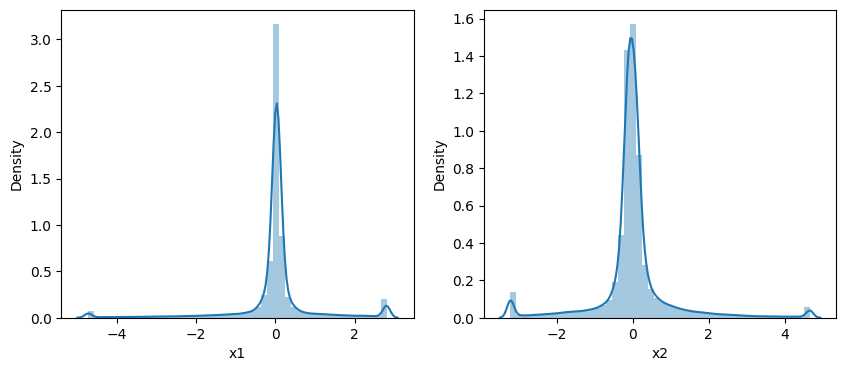

In [102]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.distplot(X_standard['x1'])
plt.subplot(1,2,2)
sns.distplot(X_standard['x2'])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11952\1256862627.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_standard['x3'])


<AxesSubplot: xlabel='x3', ylabel='Density'>

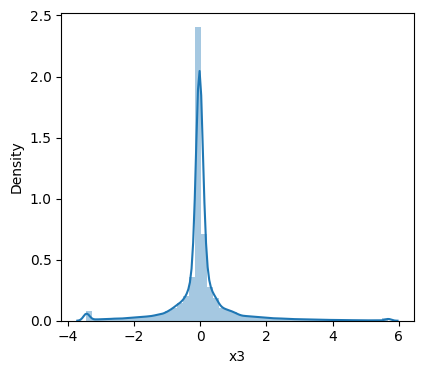

In [103]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
sns.distplot(X_standard['x3'])

# Data Spliting

In [148]:
X_train,x_test,y_train,y_test = train_test_split(X_MinMax,y,test_size=0.3,random_state=42)

In [149]:
K = 5
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train,y_train)

c:\Users\Administrator\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [150]:
y_pred = model.predict(x_test)

In [115]:
# Menghitung akurasi
accuracy = np.mean(y_test == y_pred)
print('Akurasi:', accuracy)

ValueError: Unable to coerce to Series, length must be 1: given 45900

In [151]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.48      0.50      0.49     15253
           2       0.49      0.46      0.48     15301
           3       0.62      0.62      0.62     15346

    accuracy                           0.53     45900
   macro avg       0.53      0.53      0.53     45900
weighted avg       0.53      0.53      0.53     45900



In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average= 'micro')
recall = recall_score(y_test, y_pred, average= 'micro')

In [153]:
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

Accuracy: 0.53
Precision: 0.53
Recall: 0.53


# MinMaxScaler

In [147]:
# standarScaler
X_MinMax= MinMax.fit_transform(X_wind)
X_MinMax = pd.DataFrame(X_MinMax)
X_MinMax


,0,1,2
0,0.633978,0.423573,0.374079
1,0.633978,0.392956,0.374079
2,0.625921,0.423573,0.375000
3,0.626842,0.400092,0.371317
4,0.633057,0.399171,0.375000
...,...,...,...
152995,0.644797,0.423573,0.342541
152996,0.614180,0.411832,0.373158
152997,0.668969,0.381215,0.350599
152998,0.617864,0.449586,0.363260


In [146]:
X_MinMax.describe()

,0,1,2
count,153000.000000,153000.000000,153000.000000
mean,0.627335,0.408746,0.377031
std,0.132915,0.126844,0.109469
min,0.000000,0.000000,0.000000
25%,0.620396,0.384899,0.363260
50%,0.631215,0.404696,0.374079
75%,0.642035,0.427026,0.387661
max,1.000000,1.000000,1.000000


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11952\479429642.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_MinMax['x1'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11952\479429642.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_MinMax['x2'])


<AxesSubplot: xlabel='x2', ylabel='Density'>

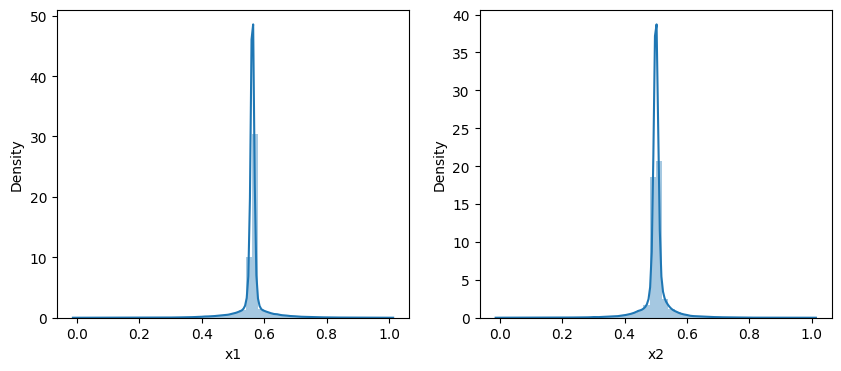

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(X_MinMax['x1'])
plt.subplot(1,2,2)
sns.distplot(X_MinMax['x2'])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11952\15278303.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_MinMax['x3'])


<AxesSubplot: xlabel='x3', ylabel='Density'>

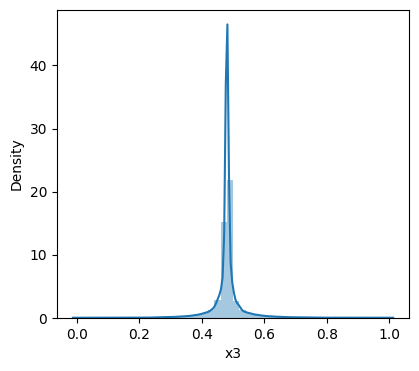

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(X_MinMax['x3'])